In [ ]:
!pip install -q imbalanced-learn seaborn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (
    classification_report, confusion_matrix, silhouette_score,
    mean_squared_error, r2_score,
    roc_curve, auc, RocCurveDisplay
)
from imblearn.over_sampling import (SMOTE, ADASYN)
from collections import Counter
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
# Load the CSV file from the dataset
df = pd.read_csv(f"{path}/heart.csv")
df.head()
df.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# 📊 Correlation Heatmap between the features

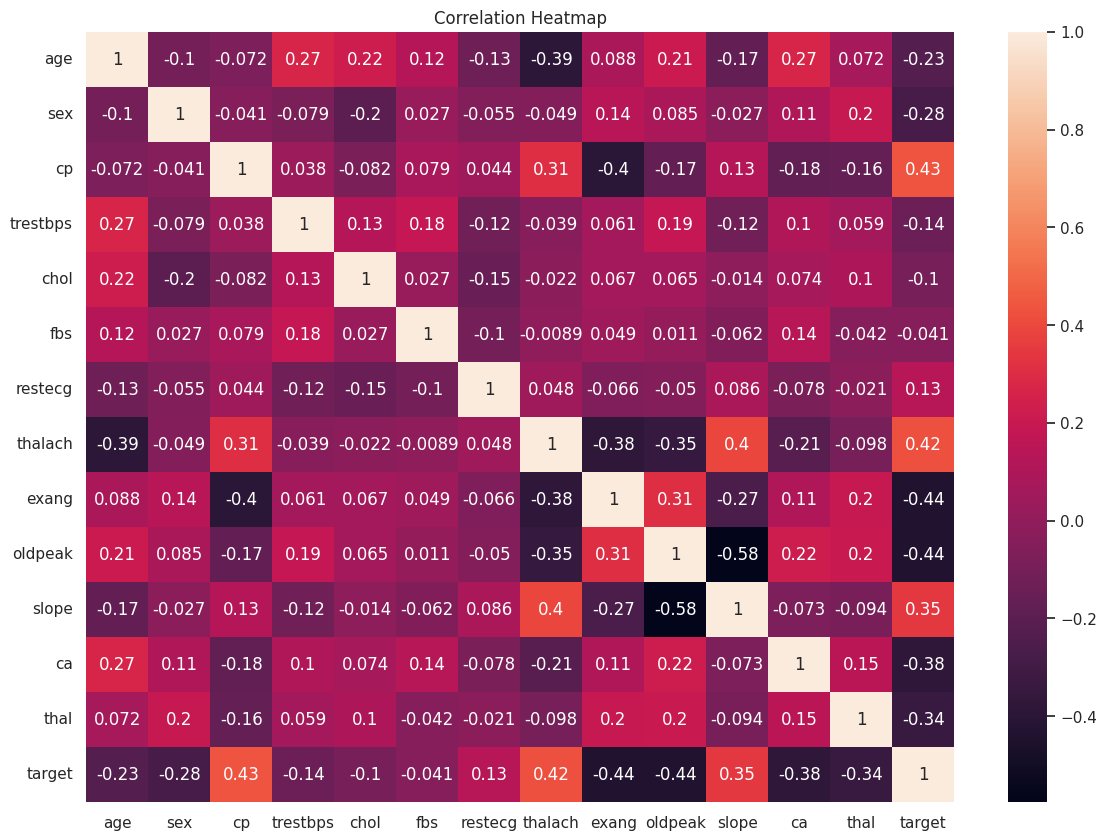

In [ ]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# 📊 Heart Disease Count

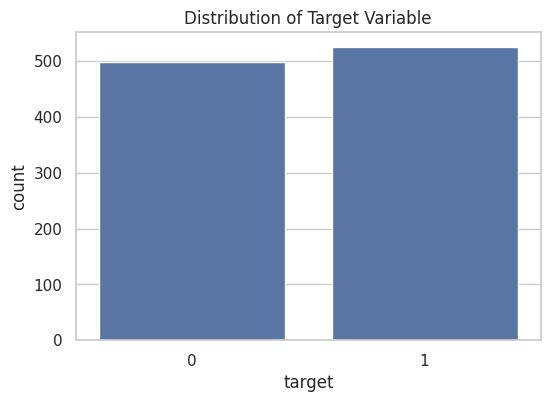

In [ ]:
# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target')
plt.title('Distribution of Target Variable')
plt.show()

## **🧠 Inferences from Heart Disease Count (Target)**
**1. More Individuals Have Heart Disease (target = 1)**

- The countplot shows that the number of individuals with heart disease is slightly greater than those without.

- This suggests that the dataset is either balanced or slightly skewed toward positive cases, which is important for modeling.

**2. Useful for Supervised Learning**

- A near-balanced class distribution is ideal for training classification models like logistic regression, decision trees, etc., as it reduces bias toward majority class.

**3. Clinical Insight**

- A higher count of individuals with heart disease may reflect the dataset’s focus on patients at risk or referred for testing.



# 📊 Age Distribution

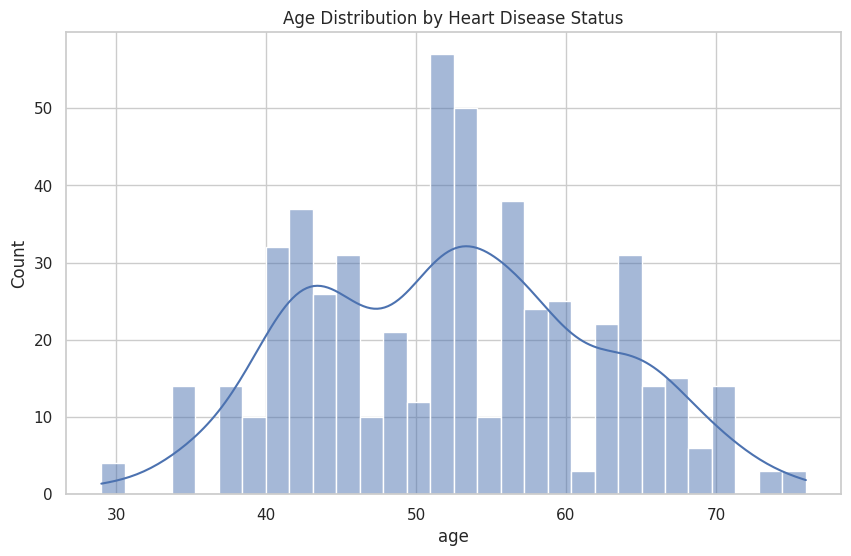

In [ ]:
# Age distribution by target
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['target']==1], x='age', bins=30, kde=True)
plt.title('Age Distribution by Heart Disease Status')
plt.show()


## **🧠 Inferences from Histplot: Age Distribution**
**1. Most Patients Are Middle-Aged**

- The majority of individuals fall between ages 50 and 60, indicating that heart disease screening is common in this age range.

**2. Distribution is Slightly Right-Skewed (Positively Skewed)**

- There are fewer younger patients (under 40) and fewer older patients (over 70), with the peak around 55.

**3. Age Range Is Broad**

- The dataset includes patients from around 29 to 77 years, offering a wide age spectrum for analysis.

**4. Potential Clinical Insight**

- The peak in the 50s aligns with increased cardiovascular risk that typically begins in midlife, reinforcing this age group's importance in preventive screening.

# 📊 Sex vs Heart Disease

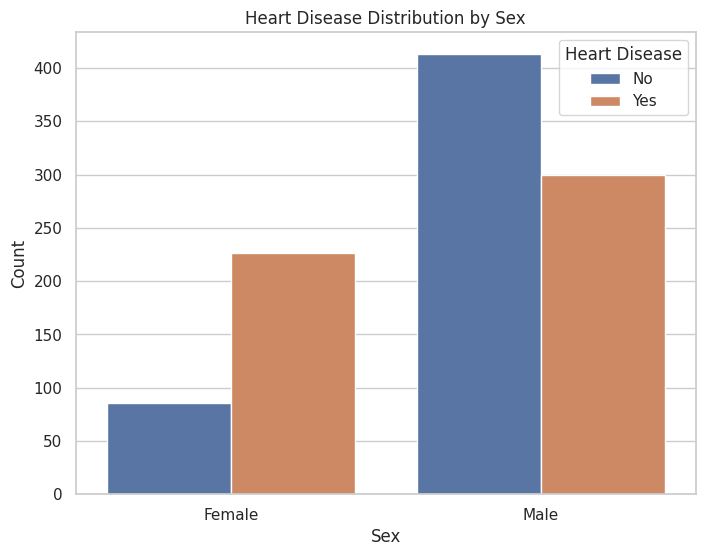

In [ ]:
# Count plot of heart disease distribution by sex
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='target')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Heart Disease Distribution by Sex')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


## **🧠 Inferences from Countplot: Sex vs Heart Disease**

**1. More Males in the Dataset**

* The countplot shows that **males** make up a larger portion of the dataset compared to females.

**2. Higher Heart Disease Cases Among Females (Proportionally)**

* Among **females**, the number of individuals **with heart disease is significantly higher** than those without.

* This indicates a **higher proportion of heart disease** in females relative to their total count.

**3. More Males Without Heart Disease**

* Among **males**, the count of individuals **without heart disease is higher** than those with it.

* Although the **absolute number of males with heart disease is high**, the **prevalence is proportionally lower** than in females.

**4. Clinical Implication**

* This suggests that **females in this dataset are more likely to have heart disease** relative to their population, which could highlight the importance of **improved screening and awareness** in women, who are sometimes underdiagnosed.

* **Males**, while more numerous in the dataset, appear to have **better heart health outcomes proportionally** in this case.



# 📊 Age vs Heart Disease

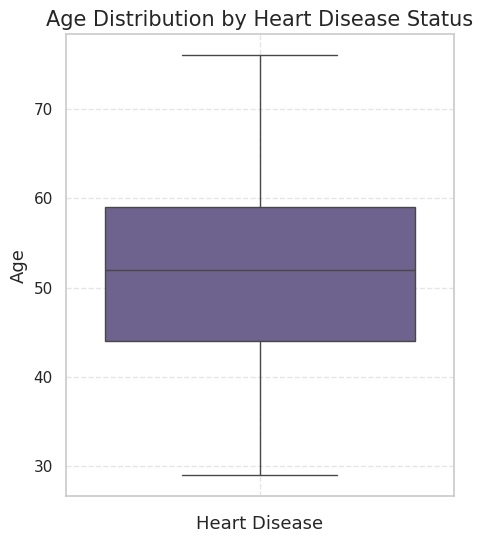

Age Median for Heart Disease:  58.0


In [ ]:
plt.figure(figsize=(5, 6))
sns.set(style="whitegrid")

# Use a more vibrant color palette
sns.boxplot(data=df[df['target']==1], y='age', color='#6B5B95')

# Customize labels and title
# plt.xticks([0], [ 'Heart Disease'], fontsize=12)
plt.xlabel('Heart Disease', fontsize=13)
plt.ylabel('Age', fontsize=13)
plt.title('Age Distribution by Heart Disease Status', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

median_age =  df.groupby('target')["age"].median()
print("Age Median for Heart Disease: ", median_age[0])

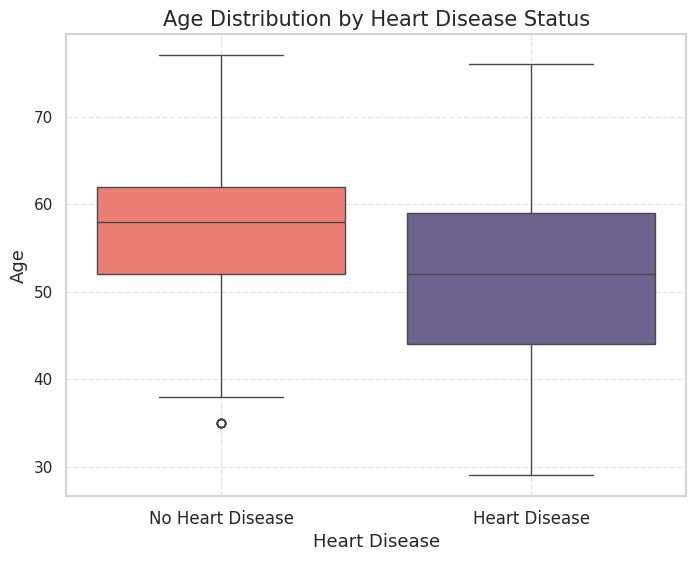

Age Median for Heart Disease:  58.0
Age Median for No Heart Disease:  52.0


In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Use a more vibrant color palette
sns.boxplot(data=df, x='target', y='age', palette={'0': '#FF6F61', '1': '#6B5B95'})

# Customize labels and title
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'], fontsize=12)
plt.xlabel('Heart Disease', fontsize=13)
plt.ylabel('Age', fontsize=13)
plt.title('Age Distribution by Heart Disease Status', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

median_age =  df.groupby('target')["age"].median()
print("Age Median for Heart Disease: ", median_age[0])
print("Age Median for No Heart Disease: ", median_age[1])

## **🧠 Inferences from Boxplot: Age vs Heart Disease (Target)**
**1. Slightly Higher Median Age in No Heart Disease Group (target = 0)**

- Individuals without heart disease tend to be slightly older on average.

- The median age is higher compared to those with heart disease.

**2. Heart Disease Occurs Across a Wide Age Range**

- People with heart disease (target = 1) span a broader age range.

- This indicates that age alone is not a definitive predictor of heart disease in this dataset.

**3. More Outliers in No Heart Disease Group**

- A few older individuals without heart disease show up as outliers.

- May reflect good health or preventive care in older age.

**4. Clinical Insight**

- While older age is a known risk factor, the boxplot suggests other variables (like cholesterol, blood pressure, etc.) may contribute more significantly in this sample.

# 📊 Max Heart Rate vs Exercise-Induced Angina

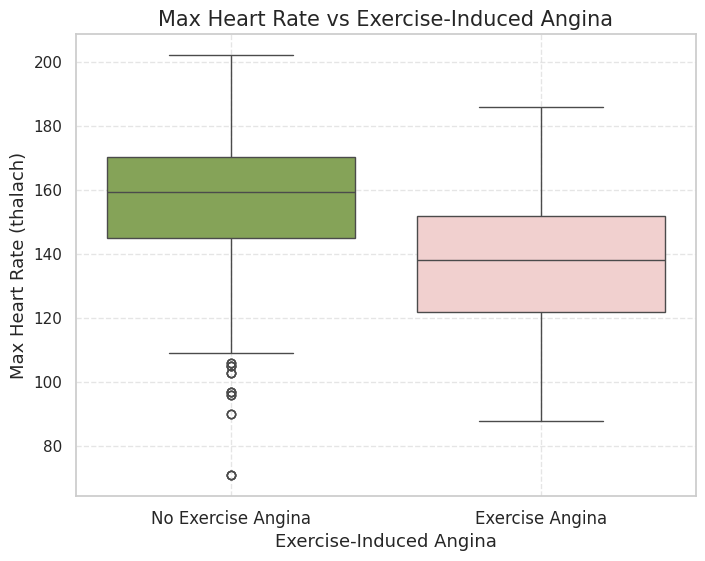

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='exang', y='thalach', palette={'0': '#88B04B', '1': '#F7CAC9'})
plt.xticks([0, 1], ['No Exercise Angina', 'Exercise Angina'], fontsize=12)
plt.xlabel('Exercise-Induced Angina', fontsize=13)
plt.ylabel('Max Heart Rate (thalach)', fontsize=13)
plt.title('Max Heart Rate vs Exercise-Induced Angina', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## **🧠 Observations from Boxplot: Thalach vs Exang**
**1. Higher Max Heart Rate Without Angina:**

- Individuals without exercise-induced angina (exang = 0) tend to have a higher median max heart rate.

- The median is above 160 bpm, while for those with angina, it’s closer to 145 bpm.


**2. Lower Max Heart Rate With Angina (exang = 1):**

- People with angina during exercise have a lower capacity to reach high heart rates, likely due to discomfort or cardiac limitations.


**3. Wider Spread in No-Angina Group:**

- The range (interquartile spread) is wider for people without angina, suggesting more variability in max heart rate.

- This group also shows more high-end outliers, indicating some individuals reach very high heart rates during stress tests.


**4. Lower Outliers in No-Angina Group:**

- A few people without angina still had very low heart rate responses—possibly due to age, medications (like beta-blockers), or other health factors.


**5. Clinical Implication:**

- The reduced heart rate in those with exercise-induced angina could indicate limited cardiovascular fitness or heart disease, aligning with known physiological responses.



# 📊 Age vs Max Heart Rate

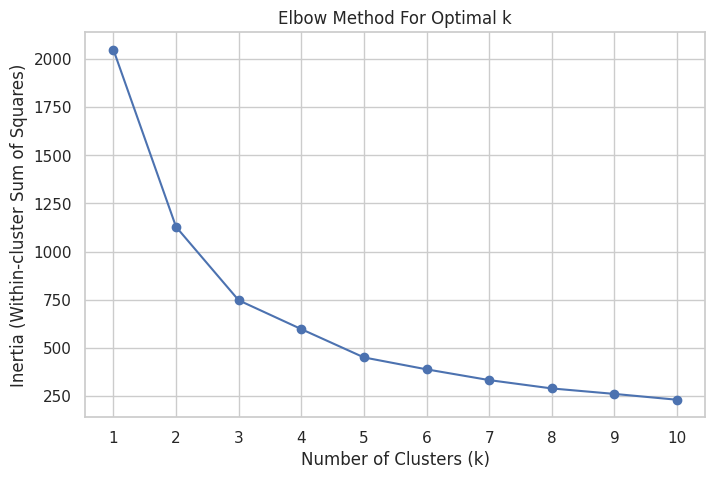

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_range = range(1, 11)

k_scaler = StandardScaler()
X = df.drop('target', axis=1)[['age', 'thalach']]
y = df['target']
X_clust = k_scaler.fit_transform(X)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clust)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()



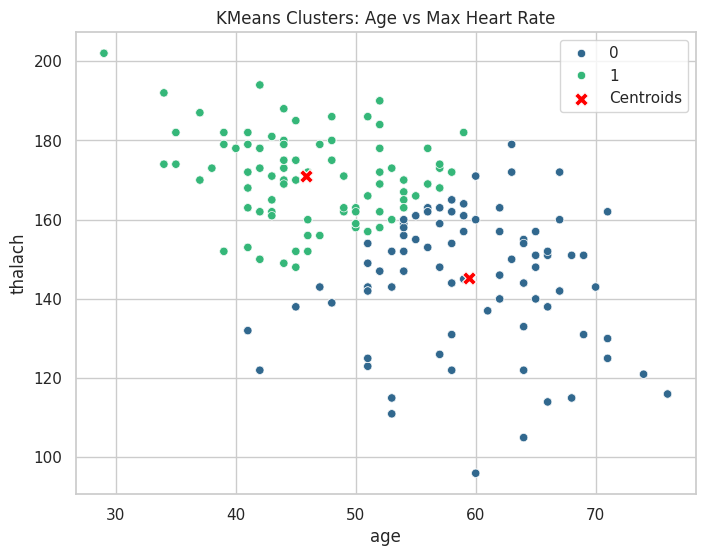

Silhouette Score: 0.3914006337025912


In [ ]:
k_scaler = StandardScaler()
X = df[df['target']==1].drop('target', axis=1)[['age', 'thalach']]
X_clust = k_scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_clust)
centroids = kmeans.cluster_centers_
centroids_original = k_scaler.inverse_transform(centroids)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[df['target']==1]['age'], y=df[df['target']==1]['thalach'], hue=clusters, palette='viridis')
sns.scatterplot(x=centroids_original[:, 0], y=centroids_original[:, 1], color='red', marker='X', s=100, label='Centroids') # Plot centroids
plt.title('KMeans Clusters: Age vs Max Heart Rate')
plt.show()

print("Silhouette Score:", silhouette_score(X_clust, clusters))


## **🧠 Observations from Scatterplot: Age vs Max Heart Rate**

**1. Cluster Separation:**

* The KMeans algorithm has grouped the data into two clusters, labeled **Cluster 0** (blue) and **Cluster 1** (green), with red crosses representing the centroids.

**2. Age Distribution:**

* The **age range** spans from about 30 to 75 years in both clusters.

* **Younger individuals (ages \~30-50)** tend to fall into **Cluster 1**, while **older individuals (\~55 and above)** are mostly in **Cluster 0**.

**3. Heart Rate Patterns:**

* **Cluster 1** primarily includes individuals with **higher max heart rates (thalach > 160)**.

* **Cluster 0** consists mostly of individuals with **lower max heart rates (thalach < 160)**.

* This separation suggests that **max heart rate tends to decrease with age**, a known physiological trend.

**4. Potential Medical Insight:**

* The clustering effectively separates **younger, likely healthier individuals with higher heart capacity** from **older individuals with lower maximum heart rates**.

* This could be useful in detecting **age-related cardiovascular performance trends**, though further analysis with clinical labels (e.g., presence of heart disease) would be needed for diagnostic utility.



# 📊 Age vs. Cholesterol

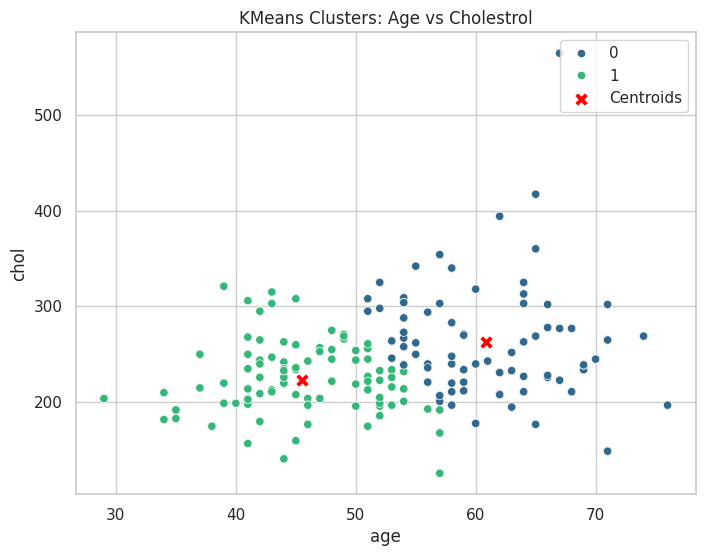

Silhouette Score: 0.3642842317062738


In [ ]:
k_scaler = StandardScaler()
X = df[df['target']==1].drop('target', axis=1)[['age', 'chol']]
X_clust = k_scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_clust)
centroids = kmeans.cluster_centers_
centroids_original = k_scaler.inverse_transform(centroids)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[df['target']==1]['age'], y=df[df['target']==1]['chol'], hue=clusters, palette='viridis')
sns.scatterplot(x=centroids_original[:, 0], y=centroids_original[:, 1], color='red', marker='X', s=100, label='Centroids') # Plot centroids
plt.title('KMeans Clusters: Age vs Cholestrol')
plt.show()

print("Silhouette Score:", silhouette_score(X_clust, clusters))


## **🧠 Observations from Scatterplot: Age vs Cholesterol**

**1. Cluster Separation:**

* The KMeans algorithm has divided the data into **two distinct clusters** (Cluster 0 and Cluster 1), with **red 'X' markers showing the centroids**.

**2. Age Distribution:**

* **Cluster 1 (green)** is mostly populated by **younger individuals (ages \~30-50)**.

* **Cluster 0 (blue)** contains **older individuals (ages \~50-75)**, suggesting age is a key factor in cluster formation.

**3. Cholesterol Patterns:**

* **Cluster 1** (younger individuals) generally have **lower cholesterol levels (chol < 250)**.

* **Cluster 0** (older individuals) tends to have **higher cholesterol values**, with several outliers above **400 mg/dL**.

* This shows a **positive correlation between age and cholesterol**, which aligns with medical expectations.

**4. Potential Medical Insight:**

* The clustering effectively separates **younger, lower-cholesterol individuals** from **older individuals with elevated cholesterol**, indicating that **age may be a driving factor in cholesterol variation**.

* This clustering could be useful in identifying patients at **higher cardiovascular risk** based on age and cholesterol trends, though additional clinical features would improve accuracy.


# 📊 Cholesterol vs. Maximum Heart Rate

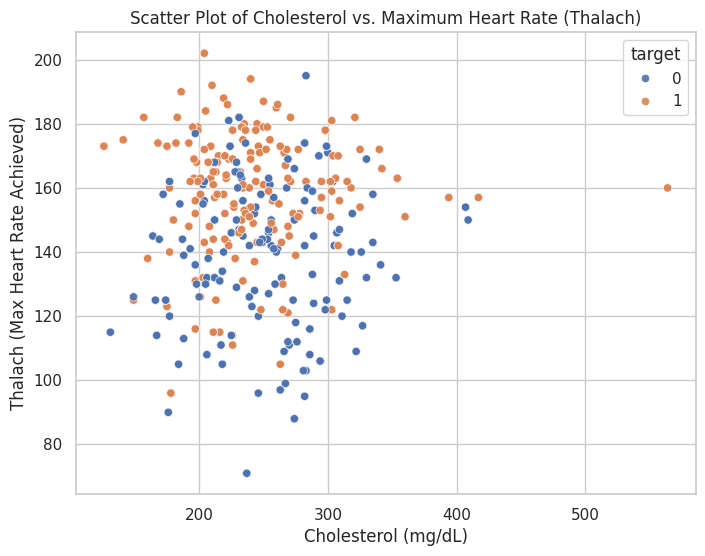

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='chol', y='thalach', hue='target', palette='deep', alpha=0.9)

plt.title('Scatter Plot of Cholesterol vs. Maximum Heart Rate (Thalach)')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Thalach (Max Heart Rate Achieved)')
plt.grid(True)
plt.show()

## **🧠 Observations from Scatterplot: Cholesterol vs. Thalach**
**1. Heart Rate vs. Disease Presence:**
- Patients with heart disease (orange) tend to achieve higher maximum heart rates (often >150 bpm).

- Patients without heart disease (blue) are more represented at lower heart rate levels (<140 bpm).

**2. Cholesterol Spread:**
- Cholesterol values range widely for both groups (150–400+ mg/dL), with no clear separation by disease status.

- This suggests cholesterol alone is not a strong discriminator for the presence of heart disease in this dataset.

**3. Dense Overlap:**
- There's significant overlap between the two classes, indicating that a single variable combination (like cholesterol and thalach) may not be sufficient for clear classification.

- A multivariate model (like logistic regression or a decision tree) using more features would likely perform better.

**4. Clinical Implication**
- While high maximum heart rate seems associated with patients who do have heart disease in this plot (contrary to expectations), this could be due to test-induced conditions (like stress ECG) or data labeling nuances.

- Cholesterol alone doesn't clearly indicate heart disease risk here—this aligns with medical understanding that multiple risk factors must be considered (e.g., age, blood pressure, chest pain type).

# 📊 Performing Linear Regression on the dataset

#### **Linear Regression**

R² Score: 0.37926825112863394
Mean Squared Error: 342.66570176487824


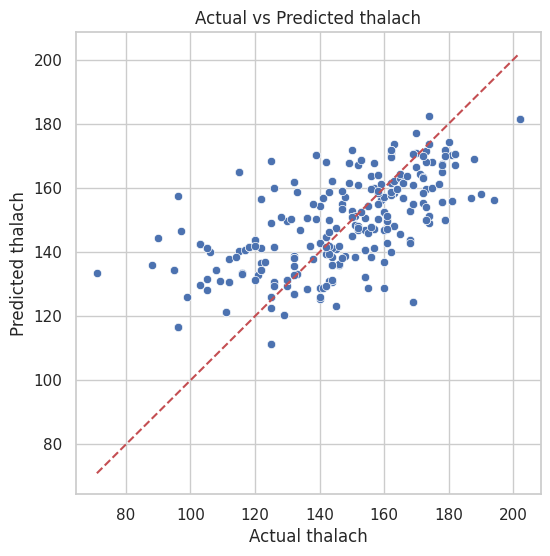

In [ ]:
X_reg = df.drop(['thalach', 'target'], axis=1)
y_reg = df['thalach']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

print("R² Score:", r2_score(y_test_reg, y_pred_reg))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))

# Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg)
plt.xlabel("Actual thalach")
plt.ylabel("Predicted thalach")
plt.title("Actual vs Predicted thalach")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.show()


Since Linear Regression resulted in a very low R² score and high error, we will use classification models like Logistic Regression and Decision Tree to achieve better performance.

# 📊 Performing Decision Tree and Logistic Regression on the dataset

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Logistic Regression**

In [ ]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.81       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.80       308
weighted avg       0.81      0.81      0.80       308



Confusion Matrix for Logistic Regression:


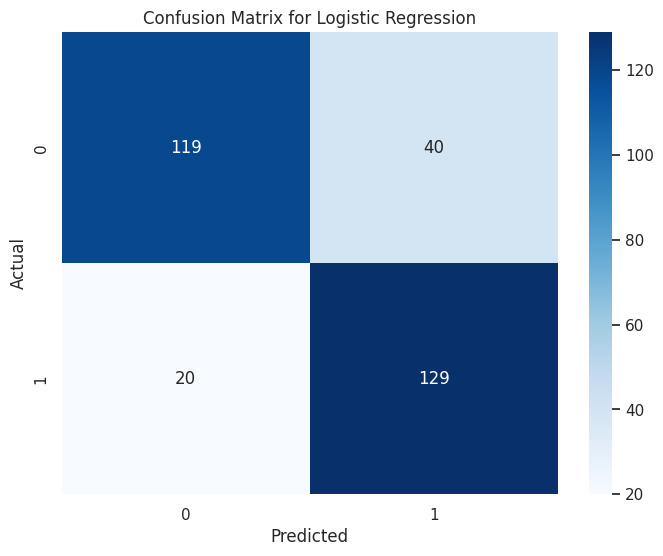

In [ ]:
# Confusion Matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix for Logistic Regression:")

# Plot Heatmap for Logistic Regression Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **Decision Tree**

In [ ]:
# Decision Tree
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

print("=== Decision Tree ===")
print(classification_report(y_test, y_pred_tree))


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       159
           1       0.78      0.91      0.84       149

    accuracy                           0.83       308
   macro avg       0.84      0.84      0.83       308
weighted avg       0.84      0.83      0.83       308



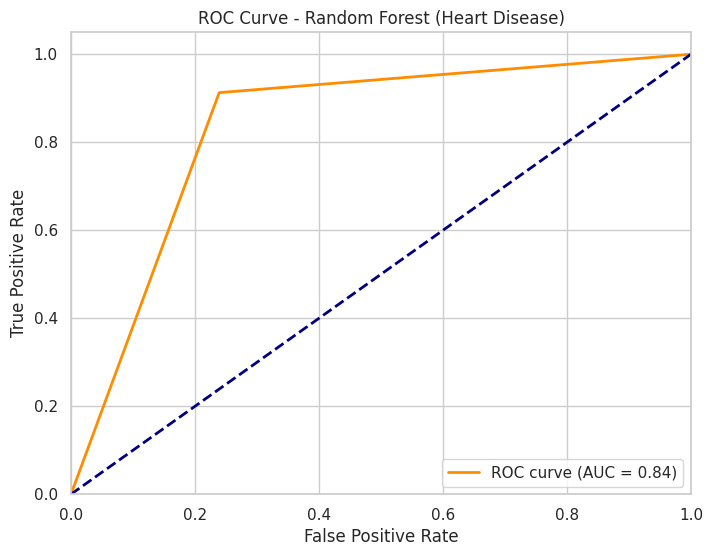

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Heart Disease)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Tree Representation for Decision Tree: 


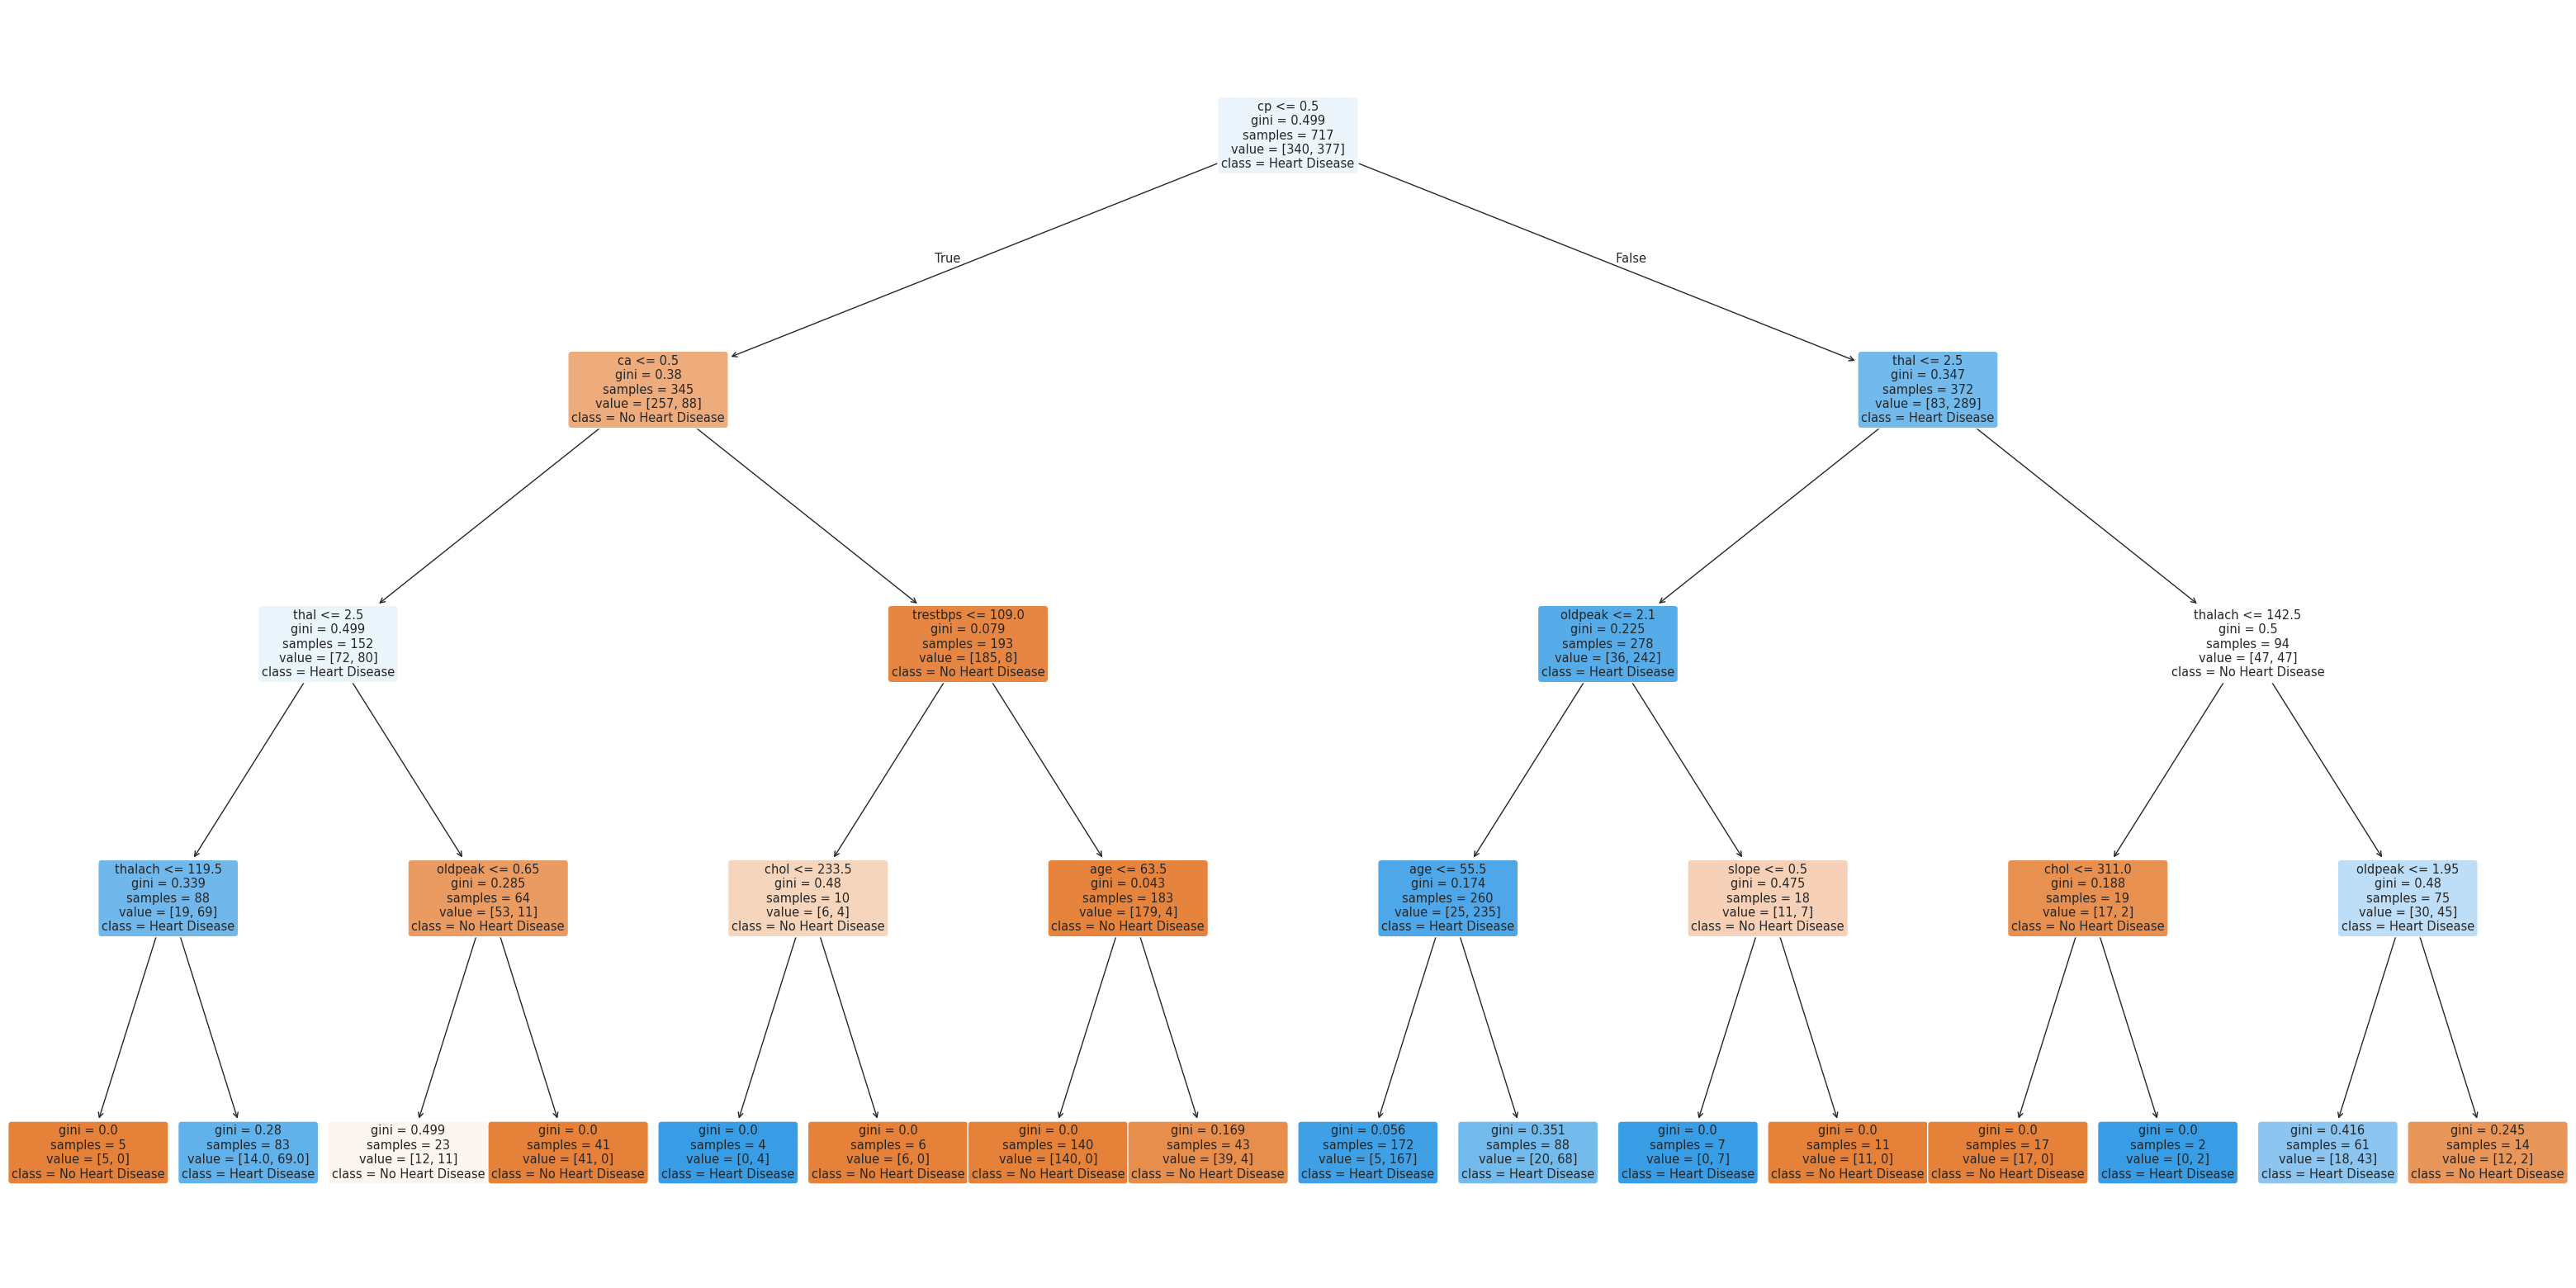

In [ ]:
from sklearn.tree import plot_tree

print("Tree Representation for Decision Tree: ")
plt.figure(figsize=(40,20))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], rounded=True)
plt.show()

Confusion Matrix for Decision Tree:


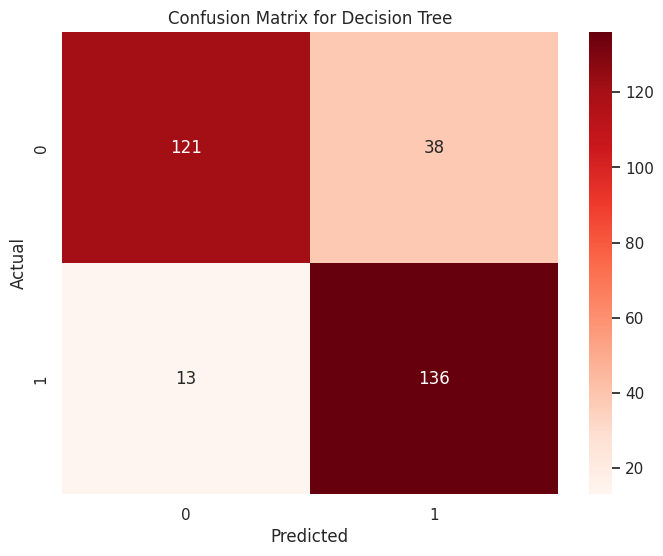

In [ ]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix for Decision Tree:")

# Plot Heatmap for Decision Tree Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds', xticklabels=[0,1], yticklabels=[0,1])
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The **decision tree model**, with an accuracy of **0.83**, slightly outperforms **logistic regression** at **0.81**, suggesting it is better at capturing the underlying patterns in the data for heart disease prediction, possibly due to its ability to model non-linear relationships.

## **Predicting a sample patient's data using decision tree**

In [ ]:
# Example patient data
sample_patient = pd.DataFrame([{
    'age': 54,
    'sex': 1,
    'cp': 0,
    'trestbps': 130,
    'chol': 250,
    'fbs': 0,
    'restecg': 1,
    'thalach': 170,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 0,
    'thal': 2
}])

sample_scaled = scaler.transform(sample_patient)

# Predict using trained decision tree model
prediction = dtree.predict(sample_scaled)
print("Heart Disease Prediction:", "Yes" if prediction[0] == 1 else "No")


Heart Disease Prediction: No


# 📊 Performing Random Forest Classification

#### **Random Forest Classifier**

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, digits=4))

=== Random Forest ===
              precision    recall  f1-score   support

           0     0.9636    1.0000    0.9815       159
           1     1.0000    0.9597    0.9795       149

    accuracy                         0.9805       308
   macro avg     0.9818    0.9799    0.9805       308
weighted avg     0.9812    0.9805    0.9805       308



Confusion Matrix for Random Forest:


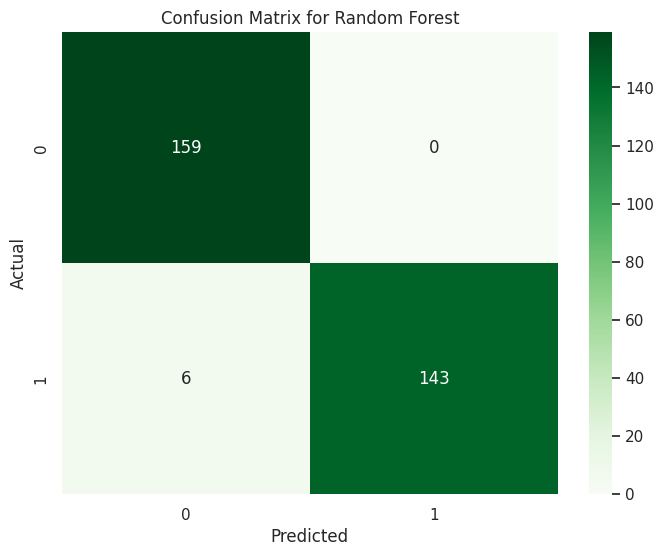

In [ ]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")

# Plot Heatmap for Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

After comparing different classification models, Logistic Regression achieved an accuracy of **0.81**, while the Decision Tree model performed slightly better with an accuracy of **0.83**. However, the Random Forest classifier significantly outperformed both, delivering a remarkable accuracy of **0.98**, demonstrating a substantial improvement in prediction performance.

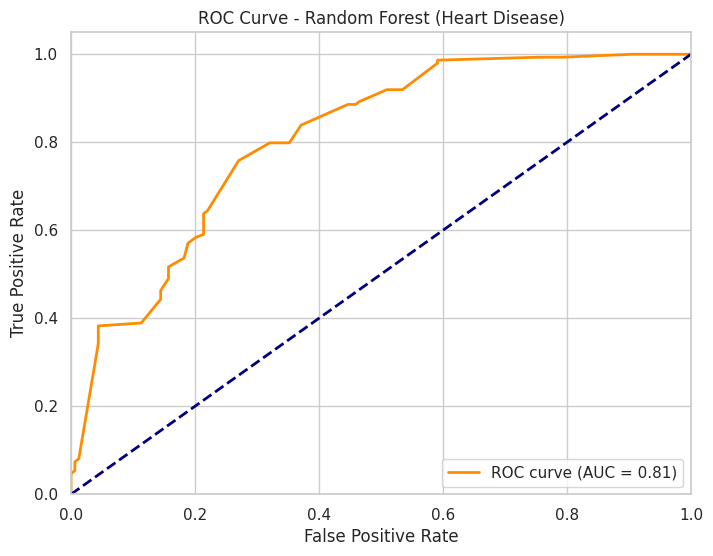

In [ ]:
# Predict probabilities
y_probs = rf.predict_proba(X_test)[:, 1]  # Probability for class 1
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Heart Disease)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


####  **🔍 ROC Curve Inference – Random Forest (AUC = 0.81)**
- **The AUC of 0.81 indicates strong classification performance.**

- **The model effectively distinguishes between patients with and without heart disease.**

- **The curve rises well above the diagonal, showing a high true positive rate with a moderate false positive rate.**

- **This suggests the model is reliable for medical prediction, but there's still room for improvement through feature tuning or model optimization.**



In [ ]:
# prompt: cross-validation for rf model

from sklearn.model_selection import cross_val_score

# Assuming 'rf' is your RandomForestClassifier and 'X_scaled', 'y' are your data
# as defined in the previous code.

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X_scaled, y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))


Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Mean cross-validation score: 0.9970731707317073


## **Predicting a sample patient's data using Random Forest**

In [ ]:
# Example patient data (values must match the feature order and scaling used in training)
sample_patient = pd.DataFrame([{
    'age': 62,
    'sex': 0,
    'cp': 2,
    'trestbps': 140,
    'chol': 270,
    'fbs': 1,
    'restecg': 0,
    'thalach': 150,
    'exang': 1,
    'oldpeak': 2.3,
    'slope': 1,
    'ca': 1,
    'thal': 3
}])

# Scale the sample using the same scaler used for training
sample_scaled = scaler.transform(sample_patient)

# Predict using trained Random Forest model
prediction_rf = rf.predict(sample_scaled)

# Output result
print("Heart Disease Prediction (Random Forest):", "Yes" if prediction_rf[0] == 1 else "No")


Heart Disease Prediction (Random Forest): No


# 📊 Improving on Random Forest using SMOTE AND ADASYN

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**SMOTE**

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Original class distribution:", Counter(y))
print("Resampled class distribution:", Counter(y_resampled))


Original class distribution: Counter({1: 526, 0: 499})
Resampled class distribution: Counter({0: 526, 1: 526})


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

sm_scaler = StandardScaler()
X_train_scaled = sm_scaler.fit_transform(X_train)
X_test_scaled = sm_scaler.transform(X_test)

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("=== Random Forest (SMOTE Resampled) ===")
print(classification_report(y_test, y_pred_rf, digits=4))

=== Random Forest (SMOTE Resampled) ===
              precision    recall  f1-score   support

           0     0.9811    1.0000    0.9905       156
           1     1.0000    0.9812    0.9905       160

    accuracy                         0.9905       316
   macro avg     0.9906    0.9906    0.9905       316
weighted avg     0.9907    0.9905    0.9905       316



Applying SMOTE led to a small but notable improvement in model accuracy (from 0.98 to 0.9905), indicating that balancing the class distribution allowed the Random Forest to better generalize across both heart disease and non-disease cases.

Confusion Matrix for Random Forest:


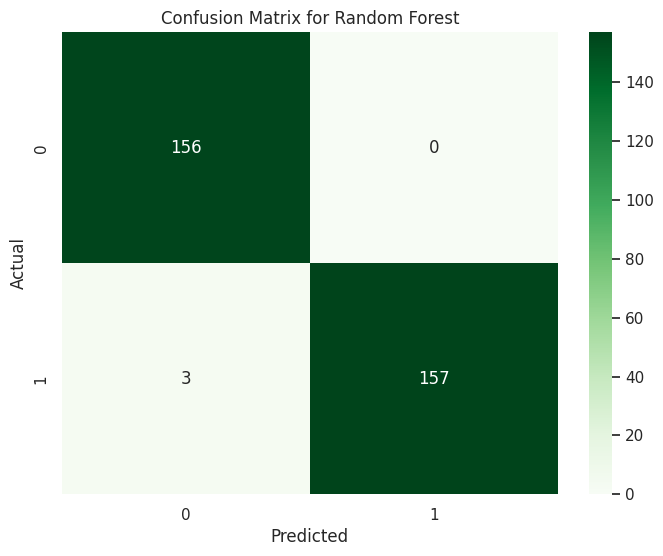

In [ ]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")

# Plot Heatmap for Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**The improvement is small but meaningful, especially if:**

- Recall or F1-score for the minority class increased — indicating better detection of actual heart disease cases.

- The confusion matrix shows fewer false negatives, which is crucial in medical contexts.

**ADASYN**

In [ ]:
adasyn = ADASYN(sampling_strategy='minority', n_neighbors=3, random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

ad_scaler = StandardScaler()
X_train_scaled = ad_scaler.fit_transform(X_train)
X_test_scaled = ad_scaler.transform(X_test)

print("Original class distribution:", Counter(y))
print("Resampled class distribution:", Counter(y_resampled))


Original class distribution: Counter({1: 526, 0: 499})
Resampled class distribution: Counter({0: 547, 1: 526})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("=== Random Forest (SMOTE Resampled) ===")
print(classification_report(y_test, y_pred_rf, digits=4))


=== Random Forest (SMOTE Resampled) ===
              precision    recall  f1-score   support

           0     0.9820    1.0000    0.9909       164
           1     1.0000    0.9810    0.9904       158

    accuracy                         0.9907       322
   macro avg     0.9910    0.9905    0.9907       322
weighted avg     0.9909    0.9907    0.9907       322



Confusion Matrix for Random Forest:


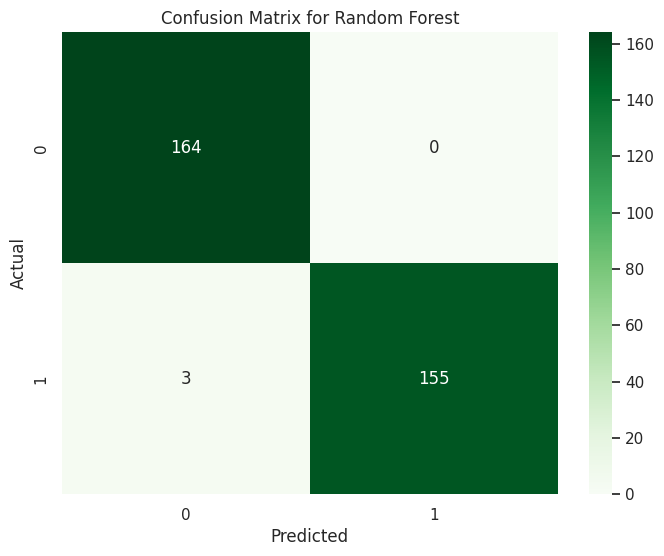

In [ ]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")

# Plot Heatmap for Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

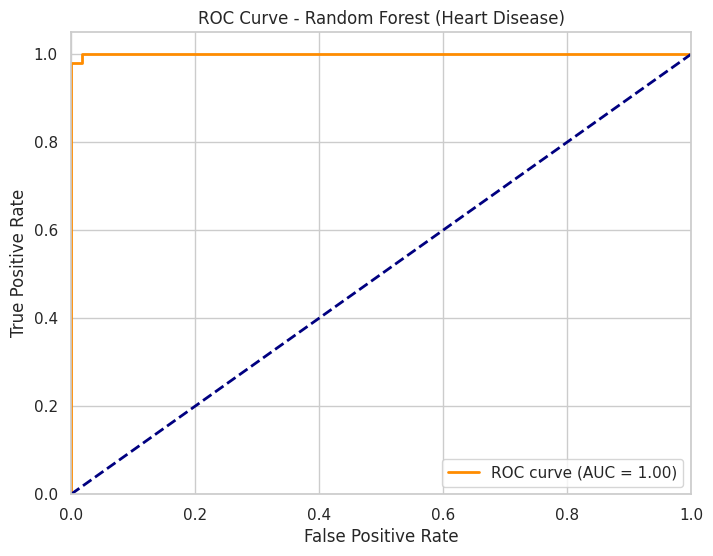

In [ ]:
# Predict probabilities
y_probs = rf.predict_proba(X_test)[:, 1]  # Probability for class 1
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Heart Disease)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



**The large jump from 0.81 to ~1.00 AUC after ADASYN strongly suggests:**
- The model is now far better at distinguishing between the classes.
- The minority class (patients with heart disease, likely) is being captured much more effectively.

# **Results after the Resampling**
- **No Resampling: Accuracy = 0.9805 (class imbalance issue)**

- **After Resampling: SMOTE = 0.9905, ADASYN = 0.9907 (minor but important accuracy boost)**

**Conclusion:**
Resampling techniques (SMOTE & ADASYN) effectively improved model performance by addressing class imbalance.
